In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)    # Display all columns 

In [2]:
# read the online file by the URL provides above, and assign it to variable "df"
# path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
# df = pd.read_csv(path,header=None)  # No headings for this data 

In [3]:
df = pd.read_csv("data.csv",header=None)  # Load without headers (col headings)

In [4]:
df.shape

(205, 26)

In [5]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
df.columns = headers
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
89,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499
49,0,?,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
125,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018
66,0,?,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72,4200,31,39,18344


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
df.isin(['?']).sum()   # Number of ? in each column

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Remove rows with ? in  price 

In [9]:
df[df['price'] == '?']   # rows with ? in price

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [10]:
# Drop rows with ? in price 
df.drop(df.loc[df['price'] == '?'].index, axis=0, inplace=True)

In [11]:
df.shape

(201, 26)

In [12]:
# Change type of price from object to float 
df['price'] = df['price'].astype('float')

### Check features that are important

In [13]:
features = ['symboling','wheel-base','length','width','height','compression-ratio',
           'curb-weight','engine-size','city-mpg','highway-mpg','price']

In [14]:
cm = df[features].corr()
cm

,symboling,wheel-base,length,width,height,compression-ratio,curb-weight,engine-size,city-mpg,highway-mpg,price
symboling,1.000000,-0.535987,-0.365404,-0.242423,-0.550160,-0.182196,-0.233118,-0.110581,-0.035527,0.036233,-0.082391
wheel-base,-0.535987,1.000000,0.876024,0.814507,0.590742,0.250313,0.782097,0.572027,-0.470606,-0.543304,0.584642
length,-0.365404,0.876024,1.000000,0.857170,0.492063,0.159733,0.880665,0.685025,-0.665192,-0.698142,0.690628
width,-0.242423,0.814507,0.857170,1.000000,0.306002,0.189867,0.866201,0.729436,-0.633531,-0.680635,0.751265
height,-0.550160,0.590742,0.492063,0.306002,1.000000,0.259737,0.307581,0.074694,-0.049800,-0.104812,0.135486
compression-ratio,-0.182196,0.250313,0.159733,0.189867,0.259737,1.000000,0.156433,0.028889,0.331425,0.268465,0.071107
curb-weight,-0.233118,0.782097,0.880665,0.866201,0.307581,0.156433,1.000000,0.849072,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.572027,0.685025,0.729436,0.074694,0.028889,0.849072,1.000000,-0.650546,-0.679571,0.872335
city-mpg,-0.035527,-0.470606,-0.665192,-0.633531,-0.049800,0.331425,-0.749543,-0.650546,1.000000,0.972044,-0.686571
highway-mpg,0.036233,-0.543304,-0.698142,-0.680635,-0.104812,0.268465,-0.794889,-0.679571,0.972044,1.000000,-0.704692


In [15]:
np.abs(cm['price']).sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
width                0.751265
highway-mpg          0.704692
length               0.690628
city-mpg             0.686571
wheel-base           0.584642
height               0.135486
symboling            0.082391
compression-ratio    0.071107
Name: price, dtype: float64

In [16]:
# pick up only required fields 
features = ['make','fuel-type','num-of-doors','body-style','drive-wheels','curb-weight',
            'engine-size','highway-mpg','price']
cars = df.loc[: , features]

In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          201 non-null    object 
 1   fuel-type     201 non-null    object 
 2   num-of-doors  201 non-null    object 
 3   body-style    201 non-null    object 
 4   drive-wheels  201 non-null    object 
 5   curb-weight   201 non-null    int64  
 6   engine-size   201 non-null    int64  
 7   highway-mpg   201 non-null    int64  
 8   price         201 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 15.7+ KB


## Univariate Analysis

### Price

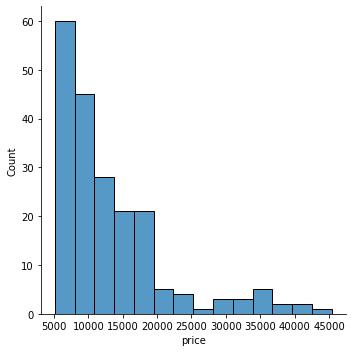

In [18]:
sns.displot(cars['price'], kde=False)

In [19]:
cars['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

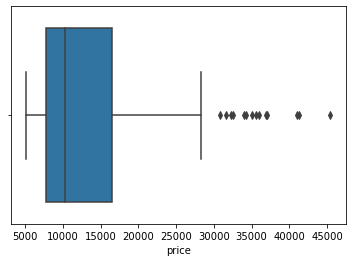

In [20]:
sns.boxplot(x = cars['price'])

### fuel-type

In [21]:
cars['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

<AxesSubplot:xlabel='fuel-type', ylabel='count'>

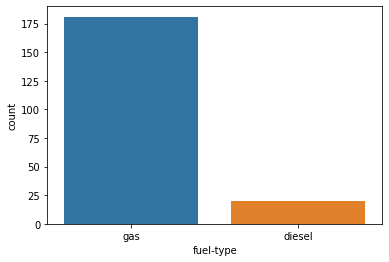

In [22]:
sns.countplot(x= cars['fuel-type'])

In [23]:
cars.groupby('fuel-type')['price'].median()

fuel-type
diesel    13852.5
gas        9989.0
Name: price, dtype: float64

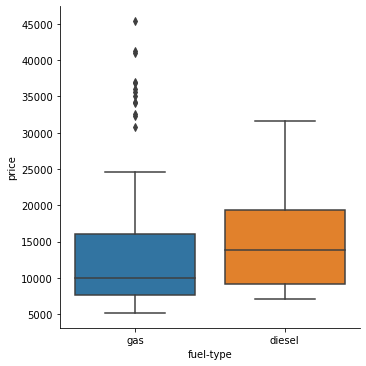

In [24]:
sns.catplot(x='fuel-type',y="price", data=cars, kind='box')

### make

In [25]:
cars['make'].unique().size

22

<AxesSubplot:xlabel='make', ylabel='price'>

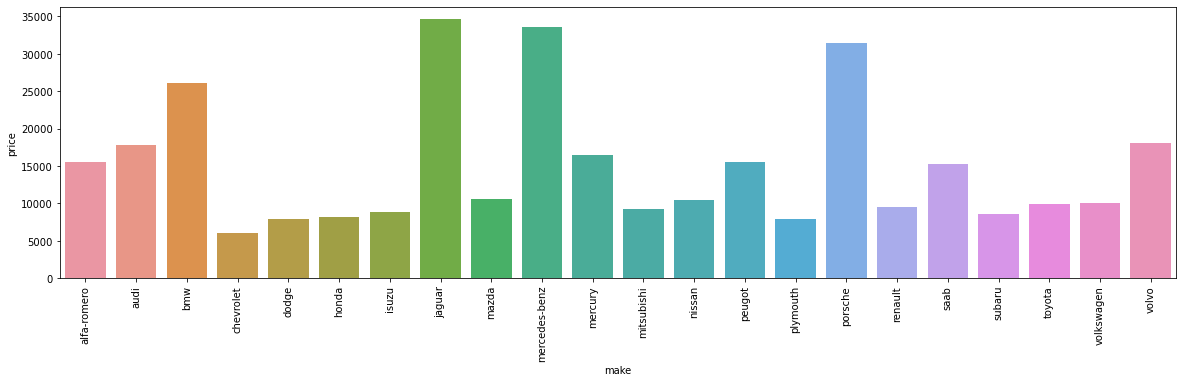

In [26]:
g = cars.groupby('make', as_index = False)['price'].mean()
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x = g['make'], y = g['price'])

In [27]:
cars.groupby('make')['price'].mean().sort_values(ascending=False)

make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
mazda            10652.882353
nissan           10415.666667
volkswagen       10077.500000
toyota            9885.812500
renault           9595.000000
mitsubishi        9239.769231
isuzu             8916.500000
subaru            8541.250000
honda             8184.692308
plymouth          7963.428571
dodge             7875.444444
chevrolet         6007.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='make', ylabel='count'>

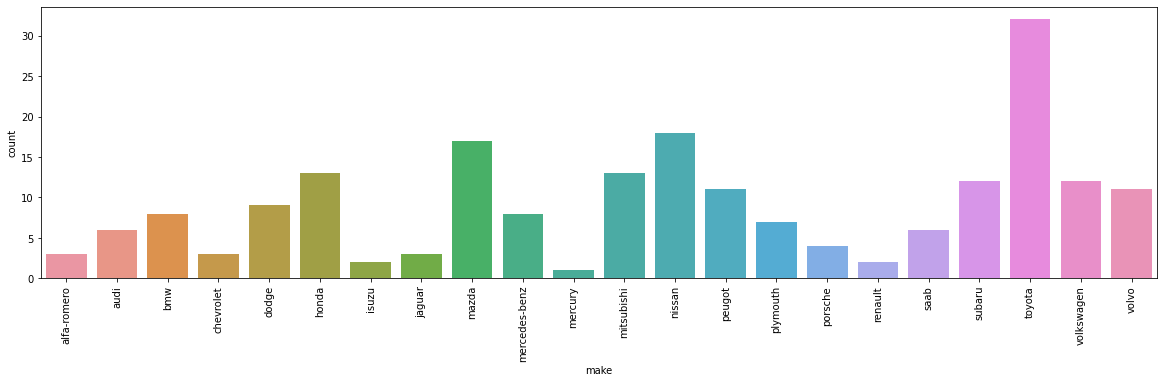

In [28]:
# Understand distribution of make
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.countplot(x= cars['make'])

In [29]:
cars['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

### Body-style

<AxesSubplot:xlabel='body-style', ylabel='count'>

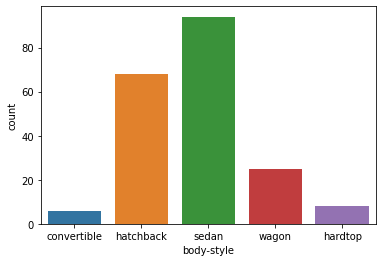

In [30]:
# Understand distribution of fuel-type
sns.countplot(x= cars['body-style'])

<AxesSubplot:xlabel='body-style', ylabel='price'>

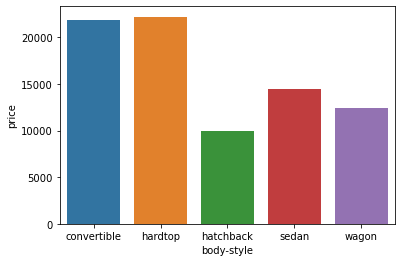

In [31]:
g = cars.groupby('body-style', as_index = False)['price'].mean()
sns.barplot(x = g['body-style'], y = g['price'])

## num-of-doors

In [32]:
cars['num-of-doors'].value_counts()

four    113
two      86
?         2
Name: num-of-doors, dtype: int64

In [33]:
# Replace ? in no-of-doors with mode of no-of-doors
cars.loc[cars['num-of-doors'] == '?', 'num-of-doors'] = cars['num-of-doors'].mode()[0]

<AxesSubplot:xlabel='num-of-doors', ylabel='count'>

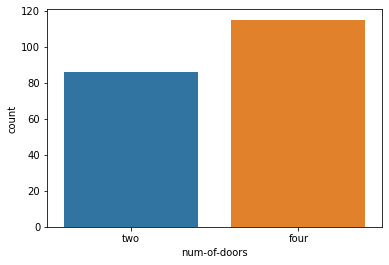

In [34]:
# Understand distribution of fuel-type
sns.countplot(x= cars['num-of-doors'])

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

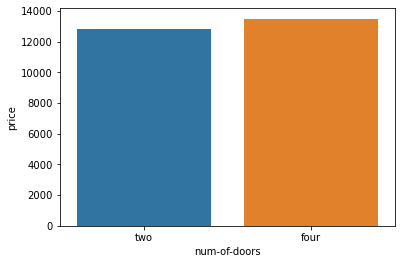

In [35]:
sns.barplot(x="num-of-doors", y="price", data = cars, ci = False)

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

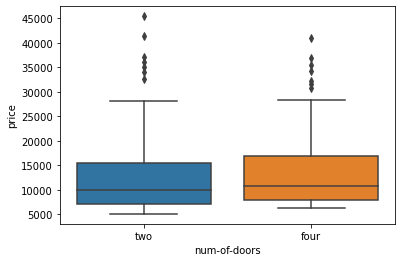

In [36]:
sns.boxplot(x="num-of-doors", y = "price", data = cars)

### drive-wheel

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

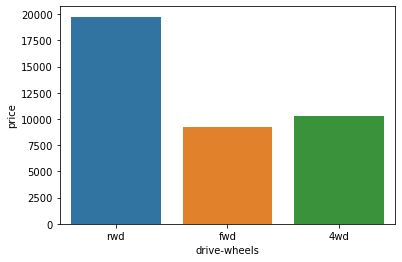

In [37]:
sns.barplot(x="drive-wheels", y='price', data=cars, ci= False)

<AxesSubplot:xlabel='drive-wheels', ylabel='count'>

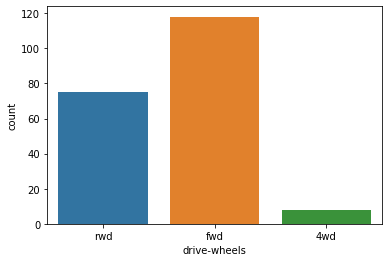

In [38]:
sns.countplot(x="drive-wheels", data=cars)

### engine-size

<AxesSubplot:xlabel='engine-size'>

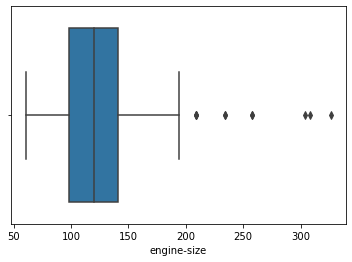

In [39]:
# Understand distribution of engine-size
sns.boxplot(x= cars['engine-size'])

<AxesSubplot:xlabel='make', ylabel='engine-size'>

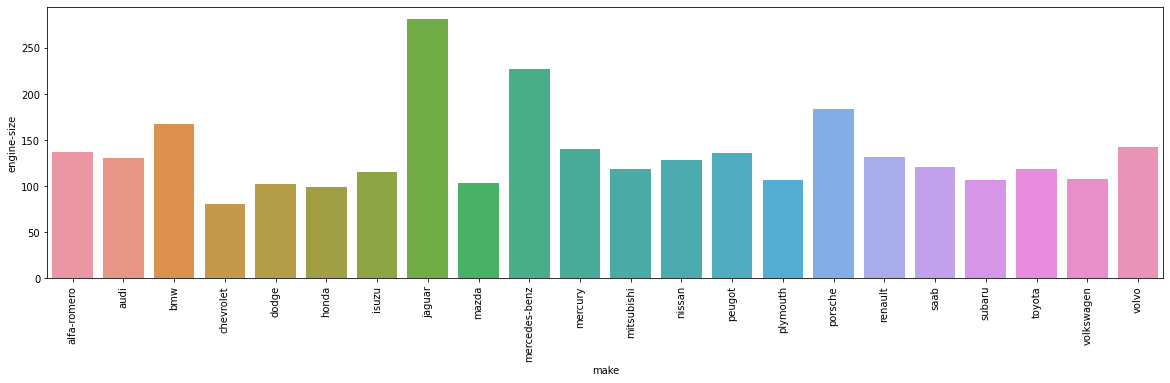

In [40]:
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x='make',y='engine-size', data=cars, ci=False)

### highway-mpg

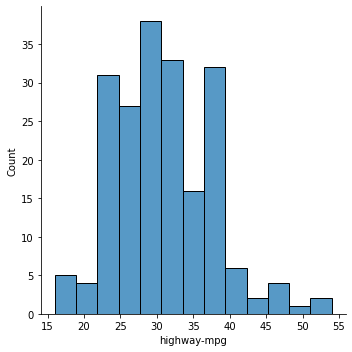

In [41]:
# Understand distribution of highway-mpg
sns.displot(x = cars['highway-mpg'], kde=False)

<AxesSubplot:xlabel='make', ylabel='highway-mpg'>

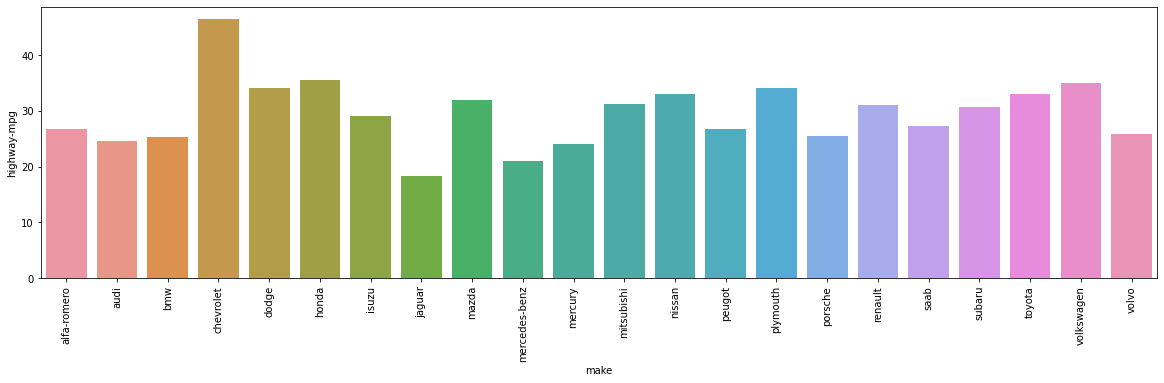

In [42]:
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(x='make', y = 'highway-mpg', data = cars, ci=False)

In [43]:
cars.isin(["?"]).sum()

make            0
fuel-type       0
num-of-doors    0
body-style      0
drive-wheels    0
curb-weight     0
engine-size     0
highway-mpg     0
price           0
dtype: int64

<AxesSubplot:>

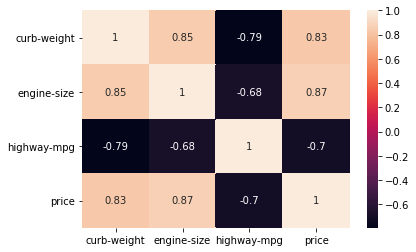

In [44]:
sns.heatmap(cars.corr(), annot=True)

<AxesSubplot:xlabel='curb-weight', ylabel='highway-mpg'>

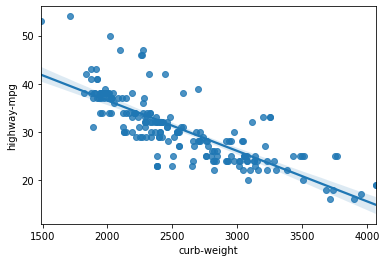

In [45]:
sns.regplot(x="curb-weight", y = "highway-mpg", data=cars)

<AxesSubplot:xlabel='engine-size', ylabel='price'>

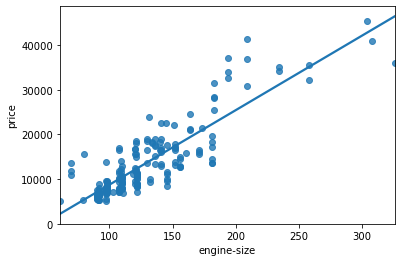

In [46]:
# Compare Engine size with price 
sns.regplot(x ="engine-size", y = 'price', data = cars,ci=False)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

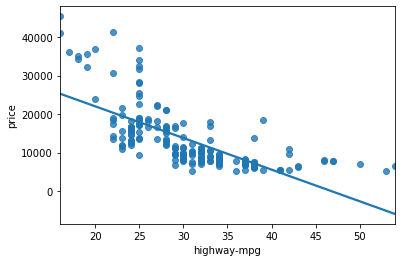

In [47]:
# Compare city-mpg with price 
sns.regplot(x ="highway-mpg", y = 'price', data = cars, ci = False)

## Save final DF

In [48]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          201 non-null    object 
 1   fuel-type     201 non-null    object 
 2   num-of-doors  201 non-null    object 
 3   body-style    201 non-null    object 
 4   drive-wheels  201 non-null    object 
 5   curb-weight   201 non-null    int64  
 6   engine-size   201 non-null    int64  
 7   highway-mpg   201 non-null    int64  
 8   price         201 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 23.8+ KB


In [49]:
cars.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels',
       'curb-weight', 'engine-size', 'highway-mpg', 'price'],
      dtype='object')

In [50]:
cars.shape

(201, 9)

In [51]:
cars.to_csv("final_cars.csv",index=False)